<a href="https://colab.research.google.com/github/davidbeard741/Google-Colab-Public/blob/main/chapter_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PH2514: Introduction to the Space Environment \\
Summer, Academic Year 2023 \\
July to September 2023 \\
Textbook: Introduction to the Space Environment, R. C. Olsen \\


<font size="1">*Collapse* and *Expand* sections of **Chapter 5**</font>



# Chapter 5

## Introduction



In Chapter 3 we learned about the solar wind. In chapter 4 we learned about Earth's magnetic field. The magnetosphere is that region of space around Earth dominated by Earth's magnetic field. It's shape, and other properties, are heavily influenced by the sun, in the form of the solar wind and solar events such as CMEs and flares. In this chapter we will study the various qualities attributed to the magnetosphere.

## Learning Objectives

Upon completion of this chapter, you will have developed knowledge in the following topics:
- The magnetic movement and mirroring, producing gyration and bounce motions.
- Drifts caused by gradient and curvature.
- Characteristic time scales for various motions.
- McIlwain L and Invariant Latitude.
- Magnetosphere structure.
- Bow shock.  
- Magnetopause.
- The Plasmasphere and the Plasma Sheet.
- Radiation Belts.

## Learning Activities


- Read Chapter 5 of the textbook.  
- Watch the lecture recordings. Navigate to the lectures and associated powerpoint files from the left hand menu.
- As you read through the sections in the chapter, do the exercises in the corresponding online modules below.  
- Do the homework.
- Post any questions you may have about this chapter in Discussions Forum for "Chapter 5 - The Magnetosphere". Feel free to respond to any postings.
- You must take the test to complete this chapter.

## **Module 5A** - Magnetic Coordinates and the Magnetic Field

Another coordinate system, the McIlwain L coordinate system,  is exercised here, and yet another chance to calculate the magnetic field, linking this chapter back to Chapter 4. Those calculations are then used in the next module, on adiabtic invariants.  The McIlwain system is slightly different from our earlier coordinate system in that it organizes plasma along magnetic field lines.  The equations here and in chapter 4 cannot be used interchangeably, so pay close attention to make sure you are using the right equation.  (Note, at the magnetic equator the equations will be equivalent).

### Questions

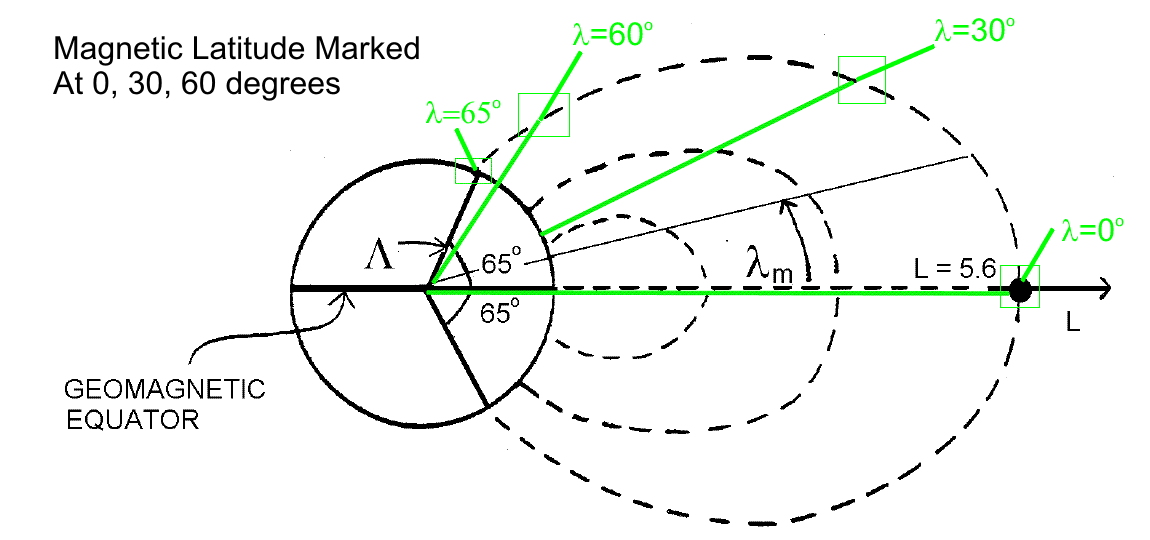

Magnetic Latitude
- $0°$
- $30°$
- $60°$

GEOMAGNETIC EQUATOR
- $Λ$
- $λ=65°$
- $λ=60°$
- $λ_m$, $L=6.6$ at $λ=0°$

Above is a diagram showing how the magnetic field varies with different values of the magnetic latitude. The invariant latitude, denoted by $Λ_c$ does not change for a particular value of $L$. Recall this is where the field line reaches the surface of the Earth. Refer to page 119 in the text for example of a calculation involving this figure.

#### 1. Calculate the Invariant Latitude $Λ_c$ for $L=3$. Refer to Equation 5.21 on pg 118.

$\displaystyle
\cos(Λ_c)=\frac{1}{\sqrt{L}} \\
\cos(Λ_c)=\frac{1}{\sqrt{3}} \\
\cos(Λ_c)=0.5773 \\
Λ_c = 54.73^{\circ} \\
$

In [ ]:
## Question 1
import math
import numpy as np

def critical_angle(L):
  """Calculates the critical angle in degrees.

  Args:
    L: The distance in meters.

  Returns:
    The critical angle in degrees.
  """

  lambda_c = 1 / np.sqrt(L)
  return np.arccos(lambda_c) * 180 / np.pi


def main():
  """Calculates the critical angle and prints it to the console."""
  L = 3
  lambda_c = critical_angle(L)
  print("L = {}".format(L))
  print("Lambda_c = {}".format(lambda_c))
if __name__ == "__main__":
  main()

#### 2. Calculate the magnetic field at the surface of the earth for the magnetic field line extending from $L=3$ (in degrees). You need the answer from problem 1, above, to do this. Use equation 4.5, or 5.22

This problem is a little more subtle than it might seem - you have to be careful to solve for the magnetic field at the surface of the earth $\left(r=1R_E \right)$, at the latitude you obtained in the previous section.  As such, you are probably best off to use the formula from the previous chapter - the one on page 118 is a little harder to manipulate.  Use Equation 4.5 from page 92. \\

$\displaystyle
B = \frac{\left(3.1 \times 10^{-5} \right) \sqrt{1+3 \sin^2(54.73^{\circ})}}{1^3} \; Tesla \\
B= 5.37 \times 10^{-5} \; Tesla \\
$


In [ ]:
## Question 2

import math
import scipy.constants as sc
import numpy as np

def magnetic_field(lambda_c_radians):
  """Calculates the magnetic field in Tesla.

  Args:
    lambda_c_radians: The critical angle in radians.

  Returns:
    The magnetic field in Tesla.
  """

  lambda_c_degrees = 54.735610317245346
  lambda_c_radians = lambda_c_degrees * np.pi / 180
  B = 3.1e-5 * np.sqrt(1 + 3 * np.sin(lambda_c_radians)**2) / 1**3
  return B


def main():
  """Calculates the magnetic field and prints it to the console."""
  lambda_c_degrees = 54.735610317245346
  lambda_c_radians = lambda_c_degrees * np.pi / 180
  B = magnetic_field(lambda_c_radians)
  print("Lambda_c = {} degrees".format(lambda_c_degrees))
  print("Lambda_c = {} radians".format(lambda_c_radians))
  print("B = {}".format(B))


if __name__ == "__main__":
  main()



#### 3. Calculate the magnetic field at $L=3$ at the magnetic equator.

$\displaystyle
B = B_{os}{R_⊕}^3 \frac{\sqrt{1+3\sin^2(λ)}}{r^3} \\
B = \frac{B_{os} \sqrt{1+3\sin^2(λ)}}{\left(\frac{r}{R_⊕}\right)^3} \\
\text{Because } λ=0 \text{ and } r=3R_E \\
B = \frac{3.1 \times 10^{-5} \sqrt{1}}{3^3} \; Tesla \\
B=1.15 \times 10^{-6} \; Tesla
$

In [ ]:
## Question 3
import math
import numpy as np

def magnetic_field(B_os, R, r, lambda_c):
  """Calculates the magnetic field in Tesla.

  Args:
    B_os: The solar magnetic field strength.
    R: The radius of the sun.
    r: The distance from the sun in kilometers.
    lambda_c: The critical angle in radians.
    R_earth is a constant that is defined in a previous problem, it is equal to 6380000.0

  Returns:
    The magnetic field in Tesla.
  """
  R_earth = 6.38e6  # meters
  r = 3 * R_earth
  B = (B_os * np.sqrt(1 + 3 * np.sin(lambda_c)**2)) / (r/R_earth)**3
  return B


def main():
  """Calculates the magnetic field and prints it to the console."""
  B_os = 31.3e-6
  R_earth = 6.38e6  # meters
  r = 3 * R_earth
  lambda_c = 0
  B = magnetic_field(B_os, R_earth, r, lambda_c)
  print("B =", f"{B:.2e}")

if __name__ == "__main__":
  main()


## **Module 5B** - The Adiabatic Invariants

Two fundamental elements of space plasma physics are exercised here - the magnetic mirroring and drift. The magnetic moment (first adiabatic invariant) defines the magnetic mirroring phenomenon. The magnetic "bounce" between hemispheres provides the second invariant (basically the time, but really the path length). The third is associated with the period associated with the azimuthal drift, largely driven by the gradient-B drift.

### Questions

#### 1. Magnetic moment and mirroring - using the numbers from Module 5A.

Calculate the pitch angle $\alpha$ which defines the loss cone for particles at $L=3$. This is the pitch angle at the equator, which maps to 90° at the mirror point.

$\displaystyle
B_{eq}(L=3) = 1.15 \times 10^{-6} \text{ T} \\
B_m(L=3) = 5.37 \times 10^{-5} \text{ T} \\
\left(\frac{\sin^2(α)}{1.5\times 10^{-6} \; T} \right)= \left(\frac{\sin^2(90^{\circ})}{5.37 \times 10^{-5} \; T} \right) \\
\text{taking the ratios of the two field strengths} \\
\sin^2(α)=\frac{1.15 \times 10^{-6} \; T}{5.37 \times 10^{-5} \; T}=\frac{1}{47} = 0.214 \\
\sin(α)=0.1463 \\
α = 8.4^{\circ}
$
\
\
This is the loss cone angle.  Charged particles with pitch angles larger than $8.4^{\circ}$ at the magnetic equator will mirror above the atmosphere.  They are magnetically trapped, and will bounce between the magnetic mirror points indefinitely.  Charged particles with equatorial pitch angles less than this will hit the atmosphere and be lost, hence the term loss cone.


In [ ]:
# Question 1
import math
import numpy as np

def calculate_alpha():
  """Calculates the pitch angle alpha.

  Returns:
    The pitch angle in degrees.
  """

  # Define constants
  sin_squared_alpha = 1.15e-6 / 5.37e-5
  sin_alpha = np.sqrt(sin_squared_alpha)

  # Calculate alpha
  alpha = np.degrees(np.arcsin(sin_alpha))

  return alpha

if __name__ == "__main__":
  alpha = calculate_alpha()
  print("Pitch angle: {} degrees".format(alpha))


#### 2. Adiabatic drift: (grad B drift)


Calculate the drift velocity for a $1$ $MeV$ proton at $90^\circ$ pitch angle, at the magnetic equator, with an altitude of $2$ $R_E$.  Not trying to be too tricky here, but note that the radius is not the altitude.

$\displaystyle
\overrightarrow{V_D}=\left(\frac{K_{\perp}}{qB}\right)\left(\frac{\left(\overrightarrow{B}\times\nabla B\right)}{B^2}\right) \\
\\
\nabla B=-\frac{3}{r}B\widehat{r}(λ=0) \\
\\
\frac{\overrightarrow{B}\times\nabla B}{B^2} |_{λ=0}=\frac{3}{r}-\widehat{θ}\times \widehat{r}) = -\frac{3}{r}\widehat{φ}\\
\\
\left|{V_D}\right|=-\frac{3}{r}\frac{K_{\perp}}{qB} \\
\left|{V_D}\right|=\frac{3}{LR_☉}\left(\frac{K_{\perp}}{q}\right)\frac{L^3}{B_o} \\
\text{Here, the term} \frac{K_{\perp}}{q} \text{can be taken as the energy in eV}\\
\left|{V_D}\right|= \frac{3L^2}{R_☉B_0}\left(\frac{K_{\perp}}{q}\right)\\
\left|{V_D}\right|= \frac{3\times 3^3}{\left(6.37\times 10^6 m\right) \left(3.1 \times 10^-5 T \right)} \times 10^6 eV \\
\left|{V_D}\right|= \frac{27}{197.5} \times 10^6 \\
\left|{V_D}\right|= 1.37 \times 10^5 \frac{m}{s}
\\
\left|{V_D}\right|= 137 \frac{km}{s}
\\
$

In [ ]:
import numpy as np

def V_D_magnitude(K_perp, q, B, r, L, B_0):
    # Given equations
    nabla_B = -3/r * B
    B_cross_nablaB_over_B2 = 3/r
    V_D_magnitude_part = -3/r * K_perp / (q * B)

    # Using your provided values for B, L, and B_0
    V_D_value = 3 * L**2 / (R_sun * B_0) * (K_perp / q)
    return V_D_value

# Constants and given values
R_sun = 6.37e6  # in meters
B_0 = 3.1e-5  # in Tesla
L = 3  # Assuming L is 3 based on your equations
K_perp_over_q = 1e6  # 1 million eV in Joules

# Calculating V_D magnitude
V_D = V_D_magnitude(K_perp_over_q, 1, 1, 1, L, B_0)  # Here I've used placeholders for K_perp, q, B, and r. Replace them with actual values as needed.

# Convert V_D from m/s to km/s
V_D_kms = V_D / 1e3

print(f"V_D = {V_D} m/s")
print(f"V_D in km/s = {V_D_kms} km/s")


## **Module 5C** - The Magnetosphere
Much of the material in the text at this point is descriptive. In this section we will look at the magnetopause, and the plasmasphere and plasma sheet.  Two calculations are possible - the magnetopause standoff distance, and the plasmapause location. The former is exercised here.


#### [NASA's THEMIS Discovers New Process that Protects Earth from Space Weather](http://www.nasa.gov/content/goddard/themis-discovers-new-process-that-protects-earth-from-space-weather/#.Uxkc115NQht). *March 6, 2014*



**1. Introduction:**
- Earth is constantly influenced by solar material streaming towards it.
- Earth's magnetosphere, a giant magnetic bubble, acts as a shield, but the effectiveness varies based on different conditions such as constant solar wind or coronal mass ejections (CMEs).
- The configuration of the magnetosphere sometimes allows significant solar material to enter, and understanding these configurations is essential for safeguarding our spacecraft against space weather.

**2. New Discovery:**
- A study found that, under certain conditions, a dense particle pool typically found deep within the magnetosphere can extend outward and help block incoming solar material.
- Brian Walsh of NASA's Goddard Space Flight Center uses an analogy, likening this mechanism to stacking furniture against a door to prevent a monster from entering.

**3. Observations and Evidence:**
- The findings were based on observations made during a moderate solar storm on Jan. 17, 2013.
- During this storm, the CME impacted Earth's magnetosphere for several hours, causing magnetic fields of both the CME and Earth to realign in a process termed "magnetic reconnection," which allowed energy and solar material to penetrate the magnetosphere.
- NASA's THEMIS spacecraft fleet observed this interaction while passing through the magnetosphere's boundary.

**4. The Role of the Plasmasphere:**
- Scientists also studied the plasmasphere, a sphere of cold dense gas located at the top of Earth's atmosphere. This gas is charged and known as plasma.
- By monitoring GPS signals which travel at varying speeds through the plasmasphere, researchers can deduce its properties.
- During the observation, a unique "plume" or "tongue" of this plasmasphere material extended to the point where the CME contacted the magnetopause (the outer boundary of the magnetosphere).
- Multiple THEMIS observations confirmed that this plume dramatically altered the characteristics of the magnetic reconnection region.

**5. Implications of the Findings:**
- The magnetosphere’s involvement in the process is contingent on the duration of the magnetic reconnection.
- A prolonged magnetic reconnection allows the plasmasphere to extend out and add an additional protective layer, curbing the magnetic reconnection.
- David Sibeck, the project scientist for THEMIS at NASA Goddard, emphasized the significance of the plasmasphere’s protective surge during extended magnetic reconnection events.

**6. Broader Context:**
- Scientists aim to enhance their understanding of Earth's space weather system.
- Observations from multiple points, such as the combination of THEMIS and GPS data, are increasingly vital to study the effects of the sun on Earth.
- Such comprehensive observations may eventually improve space weather predictions, offering invaluable insights for spacecraft operators, analogous to terrestrial weather forecasts for people on Earth.

#### [Study shows how Earth slows the solar wind to a gentle breeze.](https://www.spacedaily.com/reports/Study_shows_how_Earth_slows_the_solar_wind_to_a_gentle_breeze_999.html) *June 1, 2018 *

**1. Introduction:**
- Earth moves through the solar wind at supersonic speed while orbiting the sun.
- The solar wind is a fast stream of charged particles (plasma) emitted from the sun's outer layers.
- Earth's magnetic field protects its atmosphere from direct bombardment by these particles.

**2. Earth's Protective Bow Shock:**
- Similar to the bow-shaped wave created by a motorboat moving through water, Earth creates a "bow shock" as it moves through the solar wind.
- The main function of this bow shock is to convert the energy from the solar wind into heat stored in electrons and ions. The mechanism for this process was previously unclear.

**3. New Findings:**
- A study led by the University of Maryland made the first observations of electron heating in Earth's bow shock.
- It was discovered that electrons from the solar wind accelerate to very high speeds upon encountering the bow shock, becoming unstable and breaking down.
- This breakdown process decreases the speed of the electrons and converts their energy into heat.

**4. Implications:**
- The findings provide a deeper understanding of Earth's magnetic field and its capability to shield the planet from harmful particles and radiation.
- The research was published in the journal Physical Review Letters on May 31, 2018.

**5. Explanation by the Lead Author:**
- Li-Jen Chen, the lead author, explained the phenomenon by comparing it to a strong wind on Earth. She states that while a strong wind could knock someone over, the bow shock reduces the force of the solar wind to a gentle breeze, protecting the Earth.

**6. Data Source: NASA's MMS Mission:**
- Data was gathered from NASA's Magnetospheric Multiscale (MMS) mission, which consists of four identical satellites equipped with instruments to study Earth's magnetic field's interaction with the solar wind.
- The satellites provided three-dimensional measurements every 30 milliseconds, offering detailed insights within the bow shock layer.

**7. Importance of the MMS Measurements:**
- Thomas Moore from NASA's Goddard Space Flight Center highlighted the significance of the MMS's fast measurements. These measurements allowed the team to observe the electron heating process directly, providing insights into the underlying mechanism.

**8. New Perspective on Electron Heating:**
- Previously, it was believed that the bow shock generates heat without direct collisions between electrons, ruling out friction as the heating cause.
- The new observations challenge current theories on electron heating, particularly the observed acceleration speeds of the solar wind electron stream by the bow shock.

**9. Unexpected Data Capture:**
- Usually, the MMS satellites orbit closer to Earth and miss the bow shock. However, an unexpected surge of solar wind brought the bow shock nearer to Earth, allowing for valuable data collection.
- The electron stream's acceleration by the shock took only 90 milliseconds to destabilize and fully break down.

**10. Broader Significance and Future Steps:**
- Understanding electron heating is crucial not only for Earth's protection but also for space exploration, including satellite safety and potentially exploring other planets.
- The findings pave the way for computer simulations, further space observations, and lab experiments on electron heating.
- Chen emphasized that this study is unique as measurements came before simulations or theories, suggesting that the latter now needs to catch up with these groundbreaking observations.

#### [Uranus’ Strange Magnetosphere Switches Open and Closed, Letting in Solar Wind](https://bigthink.com/hard-science/uranus-strange-magnetosphere-switches-open-and-closed-letting-in-solar-wind/). *July 6, 2017*

**1. Introduction:**
- Uranus has an unusual magnetosphere that switches between open and closed states with each rotation of the planet, exposing it to solar winds.
- Research was conducted by the Georgia Institute of Technology, USA.
- The findings could provide insights into distant systems and refine the search for alien life.

**2. Understanding Magnetospheres:**
- A magnetosphere is a region around an object where charged particles are influenced by its magnetic field.
- It protects planets from solar wind, a stream of charged particles from the sun. Without a magnetosphere, life and liquid water would be threatened by radiation.
- Earth’s magnetosphere remains stable due to its alignment with the planet's axis, which tilts about 23 degrees.

**3. Uranus’ Peculiar Magnetosphere:**
- Uranus has a unique tilt of approximately 98 degrees, causing it to rotate on its side relative to its orbit around the sun.
- Its magnetosphere tilts 60 degrees relative to the axial tilt, making it behave like an unstable top about to fall.
- This results in the magnetosphere switching between open and closed states every 17 hours and 14 minutes (a Uranus day).

**4. Effects on Uranus:**
- When closed, Uranus' magnetosphere deflects solar wind like an umbrella.
- When open, it allows charged particles to bombard the planet.
- Carol Paty of the Georgia Institute of Technology described the magnetosphere as fast-tumbling, likening it to a child doing cartwheels. Due to this dynamic, the magnetosphere changes states daily.

**5. Comparison with Earth:**
- Earth’s magnetosphere occasionally allows a small amount of solar wind, resulting in auroras.
- In contrast, Uranus possibly witnesses spectacular auroras daily due to its frequently changing magnetosphere.

**6. Previous Knowledge and New Insights:**
- Uranus’ peculiar magnetosphere was first identified in 1986 when Voyager 2 passed the planet.
- The new understanding of its rotation and magnetosphere was presented by Carol Paty and Xin Cao in the Journal of Geophysical Research: Space Physics.

**7. Broader Implications:**
- The research offers insights into distant systems beyond Uranus, improving our understanding of various cosmic mechanisms.
- George Hospodarsky of the University of Iowa emphasizes that understanding Uranus helps validate theories about other systems.

**8. Relevance to Alien Life Search:**
- Many exoplanets discovered seem to be ice giants similar in size to Uranus.
- Xin Cao, the study leader, suggests that unique magnetospheres and misaligned magnetic fields might be typical for planets.
- Understanding how such magnetospheres protect exoplanets from stellar radiation is crucial for assessing the habitability of newly discovered worlds.

#### [The Plasmasphere We can See! ](https://plasmasphere.nasa.gov/regions.html)

**1. Introduction:**
- The NASA satellite, IMAGE, launched in March 2000, was equipped with instruments to measure Earth's plasmasphere and magnetosphere.
- Scientists have been able to identify several features of the plasmasphere using data from this satellite.

**2. Plasmasphere Rotation:**
- Contrary to popular belief, the plasmasphere does not corotate with Earth.
- Earth takes 24 hours for a full rotation, while the plasmasphere takes an average of 27 hours.
- This means Earth spins faster than the plasmasphere.

**3. Features of the Plasmasphere:**

- **Plume:** A tail-like feature caused partly by Earth's rotation and the plasmasphere's slower dragging rotation.

- **Aurora:** Also known as the "northern lights," they are visible around Earth's poles, producing a bright ring seen from space. They are present on both the North and South poles.

- **Plasmapause:** This is the "edge" of the plasmasphere, characterized by a sharp drop in plasma density.

- **Fingers:** These are long, thin areas where plasma densities are much lower, giving a finger-like appearance.

- **Crenulations:** These appear like spikes in plasma density and often look as though someone took a bite out of the plasmasphere.

- **Channels:** Formed post-storm during calming space weather conditions. They appear when plumes wrap around the main body of the plasmasphere, appearing as long, narrow low-density regions in the outer part.

- **Notches:** Large, low-density cavities in the plasmasphere that can be very narrow or broad, possibly holding a volume the size of Earth. They can extend up to 2 Earth radii from Earth's center.

- **Shoulder:** Rounded shapes on the outer boundary of the plasmasphere (plasmapause) that result from temporary blocking of the solar wind electric field penetrating the inner magnetosphere.

- **Shadow:** Not an actual feature of the plasmasphere but represents the region where Earth blocks sunlight. The plasma in this shadow does not scatter sunlight, making it appear dark. Plasma above and below the shadow is illuminated and can sometimes be seen.

**4. Conclusion:**
The IMAGE satellite has provided a detailed visualization of the Earth's plasmasphere, revealing its unique features and characteristics.

### Questions

#### 1. Using the principle of pressure balance, calculate the magnetopause standoff distance using the following values


$\displaystyle
B_{os} = 3.1 \times 10^{-5} \text{ T} \\
n = 10^7 \; \text{ m}^{-3} = 10 \; \text{cm}^{-3} \\
m = 1.67 \times 10^{-27} \text{ kg} \\
v = 500 \; \frac{\text{km}}{\text{s}} = 5 \times 10^5 \; \frac{\text{m}}{\text{s}}  \\
μ_0 = 4π\times10^{-7}
$

**Answer:**

$\displaystyle
\text{equation 5.2}\\
P_1 + \dfrac{B_1^2}{2 \mu_0} = P_2 + \dfrac{B_2^2}{2 \mu_0}
\\
\text{Assume:}
\\
\dfrac{B_1^2}{2 \mu_0} = P_2 \; \text{are zero} \\
\\
\text{Note:}
\\
P_1 = nmV^2
\\
B_2 = 2 \dfrac{B_{os}}{(\dfrac{r}{R_{base}})^3}
\\
\dfrac{r}{R_{earch}} = L
\\
\\
\text{Make these changes into equation 5.24 and note that}
\\ m = \text{mass of the proton} \text{ and }
\\ V = \text{Velocity of the solar wind}
\\
nm_pV_{sw}^2 = \dfrac{4 B_{os}^2}{2 \mu_0 L^6}
\\
L^6 = \dfrac{4 B_{os}^2}{2 \mu_0 nm_pV_{sw}^2}
\\
L^6 = \frac{4 \times \left( 3.1\times 10^{-3}\right)^2}{ \left( 8 \times π \times 10^{-7} \right) \times \left( 1.67\times10^{-27} \right) \times \left( 5 \times 10^5\right)^2 } = \frac{3.84\times10^{-8}}{1.05\times 10^{-14}} = 3.66 \times 10^5  \\
L = \left( 3.66 \times 10^5 \right)^{\frac{1}{6}}\\
L \approx 8.46
$

In [ ]:
import math

def magnetopause_distance(B_os, n, m, v, mu_0):
    """
    Calculate the magnetopause standoff distance L.

    Parameters:
    - B_os: Magnetic field
    - n: Number density
    - m: Mass of the proton
    - v: Velocity of the solar wind
    - mu_0: Permeability of free space

    Returns:
    - L: magnetopause standoff distance
    """

    # P_1 = nmV^2
    P_1 = n * m * v**2

    # nm_pV_sw^2 = (4 * B_os^2) / (2 * mu_0 * L^6)
    # => L^6 = (4 * B_os^2) / (2 * mu_0 * nm_pV_sw^2)
    L_sixth = (4 * B_os**2) / (2 * mu_0 * n * m * v**2)

    # Taking the sixth root to find L
    L = L_sixth**(1/6)

    return L

# Constants
B_os = 3.1e-5  # Tesla
n = 1e7  # m^-3
m = 1.67e-27  # kg
v = 5e5  # m/s
mu_0 = 4*math.pi*1e-7  # Tm/A or H/m

# Compute L
L = magnetopause_distance(B_os, n, m, v, mu_0)
print(f"L = {L:.2f}")


#### 2.  What are the densities and temperatures of the Plasmasphere and plasma sheet (in particles/ cm3 and eV respectively)?



*   Plasmasphere
  *   Cold, dense plasma ( $ T \thinspace \text{~} \thinspace 0.1-0.5 \thinspace eV,\thinspace n \text{~} 10^2-10^4 \thinspace cm^{-3} $ )
*   Plasma Sheet
  *   Hot, tenuous plasma ( $ T \thinspace \text{~} \thinspace 1-10 \thinspace keV,\thinspace n \text{~} 1 \thinspace cm^{-3} $ )

#### 3. Qualitatively, what is the ion composition of the plasmasphere (starting with the greatest concentration and decreasing)?

hydrogen, helium, oxygen

## **Module 5D** - The Ring Current and Radiation Belts

The process which energizes the radiation belts is not well understood, though it is actively studied.

We believe whistlers are involved in the decay process. As you open the package file for the module, above, it will play a whistler "wav" file.

The link below discusses some new information discovered by NASA's Van Allen probes.  These twin satellites were launched in 2012 to study the Van Allen belts.  They were deactivated in 2019 when they ran out of propellant.  They will remain in orbit as debris, until sometime in the 2030s.

### [NASA's Van Allen Probes Show How to Accelerate Electrons](https://www.nasa.gov/content/goddard/van-allen-probes-shows-how-to-accelerate-electrons). *July 15, 2014*

**1. Introduction:**
- The Van Allen radiation belts are two vast donuts of radiation surrounding Earth.
- Understanding their formation and behavior is crucial for space weather scientists.

**2. Van Allen Probes:**
- Launched in 2012, these nearly identical spacecraft were aimed to study the Van Allen radiation belts.
- While the inner belt is fairly stable, the outer belt changes in multiple ways that are not entirely understood.

**3. Particle Acceleration:**
- Some particles in the outer belt travel at near light speed. The mechanism for their acceleration has been a mystery.
- New data suggests a two-step process:
  1. An initial mechanism gives particles a boost.
  2. Electromagnetic waves called "Whistlers" further accelerate them to high speeds.

**4. Importance of Understanding:**
- Such processes may be prevalent around other planets or the sun.
- High-speed particles can damage spacecraft electronics and pose risks to astronauts.

**5. Theories about Energetic Particles:**
- Two main theories:
  1. Particles drift from further out, around 400,000 miles, gathering energy.
  2. An inherent mechanism in the area speeds up the particles.
- After two years of observation, the Van Allen Probes data supports the second theory.

**6. Whistler Waves:**
- Once particles reach energies of 100 keV, they sync with electromagnetic waves that further speed them up, like a swing being pushed.
- This theory had been accepted, but a new explanation for the initial push of energy has been proposed.

**7. Time Domain Structures:**
- Identified by Forrest Mozer and his team as short-duration electric field pulses parallel to magnetic fields in the radiation belts.
- These pulses initially accelerate particles along the magnetic fields.
- Previously, it was thought that the energy from this mechanism wasn't enough for Whistlers to work on, but new data and simulations have proven otherwise.

**8. Conclusion:**
- The combination of these mechanisms explains how particles are accelerated to near-light speeds in the Van Allen belts.
- The Van Allen Probes, in their unique orbit, have provided invaluable insights into this acceleration process.
- Understanding this can help protect spacecraft and astronauts from these high-speed particles.

**9. Credits:**
- The Johns Hopkins Applied Physics Laboratory built and operates the Van Allen Probes.
- The mission is part of NASA's Living With a Star program and is managed by NASA's Goddard Space Flight Center.

### [NASA Discovers New Radiation Belt Around Earth](https://www.space.com/20004-earth-radiation-belt-discovery.html). February 28, 2013

**1. Introduction:**
- A previously unknown ring of radiation surrounded Earth briefly before being almost entirely destroyed by an interplanetary shock wave.

**2. Discovery:**
- NASA's twin Van Allen space probes, studying Earth's radiation belts, made this discovery.
- The new radiation belt is temporary but highlights the vast unknowns about outer space, even regions near Earth.

**3. Background on the Van Allen Radiation Belts:**
- First significant discovery in space exploration was the Van Allen radiation belts, discovered in 1958.
- These are zones of magnetically trapped, highly energetic charged particles.
- Large amounts of radiation from these belts can threaten satellites.

**4. The Van Allen Probes:**
- Launched by NASA in summer 2012 to study the radiation belts.
- Equipped with advanced sensors to analyze the plasma, energetic particles, magnetic fields, and plasma waves in these belts with high precision.

**5. The New Radiation Belt:**
- Unexpectedly found by the probes.
- A third belt made of super-high-energy electrons located 11,900 to 13,900 miles (19,100 to 22,300 kilometers) above Earth.
- Formed around Sept. 2 and persisted for over four weeks.
- Initially, there was skepticism about the instrument readings, but the quality of the instruments confirmed the discovery's validity.

**6. Disappearance of the New Belt:**
- The newfound radiation belt vanished almost entirely around Oct. 1.
- Likely disrupted by an interplanetary shock wave due to a surge in solar wind speeds.

**7. Remarks by Baker:**
- Even five decades after the discovery of the Van Allen belts, new findings continue to emerge.
- The belts need to be re-assessed both theoretically and observationally.

**8. Radiation Belt Mystery:**
- Unclear how the temporary radiation belt was formed.
- Scientists hypothesize it might have been due to the solar wind stripping away the outer Van Allen belt.
- Existence possibly influenced by solar disturbances.

**9. Future Investigations:**
- Further research on the Van Allen belts can determine if such temporary radiation rings are common or rare events.
- Modern tools and increased attention may lead to more surprising revelations about the belts.

**10. Publication:**
- The detailed findings were published online on Feb. 28 in the journal Science.

### [Ten highlights from NASA's Van Allen Probes mission](https://www.spacedaily.com/reports/Ten_highlights_from_NASAs_Van_Allen_Probes_mission_999.html). October 18, 2019

1. **End of Van Allen Probes**:
    - The second of the twin Van Allen Probes will be shut down on Oct. 18, 2019, marking the end of seven years of operation.
    - Spacecraft A will be decommissioned at Johns Hopkins University Applied Physics Lab; Spacecraft B was terminated three months prior.
    
2. **Achievements and Resilience**:
    - The probes operated in the radiation belts, enduring harsh space environments without interruptions.
    - It set records for tolerance and operation in these conditions.

3. **Mission Objectives**:
    - Originally planned for two years, the probes aimed to study the Van Allen belts – charged particles trapped by Earth's magnetism.
    - Their findings have revolutionized our understanding of the near-Earth environment.

4. **Significance of the Discoveries**:
    - Over 600 publications and 55 Ph.D. theses are based on Van Allen Probes' data.
    - The mission gave insights into invisible forces that move particles within the belts and researched space weather effects.

5. **Understanding Radiation Belts**:
    - The Van Allen Probes made numerous discoveries about radiation belts' architecture and dynamics.
    - They identified previously unnoticed radiation belt features and mechanisms for particle acceleration and loss.

6. **Notable Discoveries**:
    - A third radiation belt can form during intense solar activities.
    - Plasma waves called electrostatic double layers can energize the belts, even generating one million volts in six minutes.
    - Ions from space weather storms can alter Earth's magnetic field.
    - One type of plasma wave, known as hiss, can cause electron loss from the belts.
    - The inner Van Allen belt lacks electrons with energies over a million electron volts.
    - Two types of whistler chorus waves cannot co-exist, affecting radiation belt particle scattering.
    - Very low-frequency chorus waves can rapidly increase particle energy in the belts during storms.
    - Computer simulations helped understand particle behavior in relation to Earth's magnetism.
    - The probes observed ultra-energetic ions heading to Earth, with their acceleration linked to electric charge, not mass.
    - Data showed the Earth's plasmasphere changes in sync with the Sun's rotation, influenced by variations in solar wind.

7. **Impact on Science**:
    - The Van Allen Probes provided groundbreaking insights into radiation belt physics, helping rewrite textbooks on the subject.

8. **Study of Plasma Waves**:
    - The probes offered a deep understanding of plasma waves' role in particle movement, acceleration, and the effects of space weather on our near-Earth environment.

9. **The Role of Johns Hopkins APL**:
    - They not only managed the Van Allen Probes but also designed and built the spacecraft, ensuring high-quality data acquisition.

10. **Legacy of the Mission**:
    - The Van Allen Probes have made a lasting impact, with their discoveries playing a pivotal role in advancing our knowledge of Earth's radiation belts and near-Earth space physics.

### Questions

#### Illustration of Whistlers

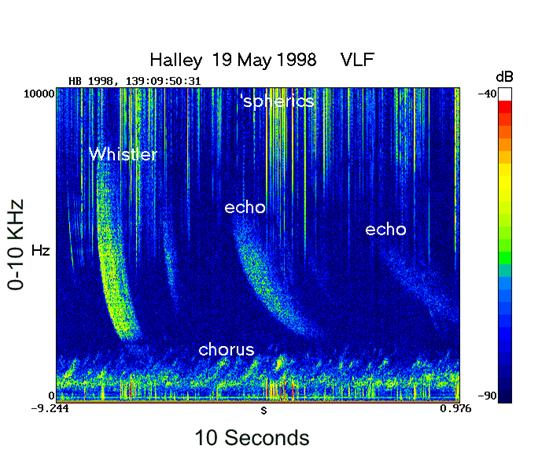

#### 1. Matching. In radiation belts: ions decay by ______, electrons decay by ______.
 a) charge exchange, scattering through whistlers \\
 b) scattering through whistlers, charge exchange

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output

question = widgets.Label('Matching. In radiation belts: ions decay by ______, electrons decay by ______.')

# Define the choices
choices = widgets.RadioButtons(
    options=[
        'a) charge exchange, scattering through whistlers',
        'b) scattering through whistlers, charge exchange'
    ],
    description='',
    disabled=False,
    layout=widgets.Layout(width='90%')
)

# Create a container for the choices with a description
choices_container = widgets.VBox(
    [widgets.Label("Choices:"), choices]
)

# Create a button for submission
submit_button = widgets.Button(description="Submit")

output = widgets.Output()

def check_answer(button_content):
    with output:
        clear_output()
        if choices.value == 'a) charge exchange, scattering through whistlers':
            print("Correct!")
        else:
            print("Incorrect. Try again.")

submit_button.on_click(check_answer)

display(question, choices_container, submit_button, output)


## **Module 5E** - Nova Video

THEMIS is a mission designed to determine the origin of substorms.  Watch the video for an overview, then click the link below for results and information on the follow on mission, ARTEMIS.

### [Space Storms - NOVA scienceNOW](https://youtu.be/e6qvaSmQloQ). *March 30, 2009*

### Introduction
- **Funding**: Supported by corporate and foundation funds.
- **Presentation**: Features a meteorologist in space, highlighting the space storms that can impact Earth's communication systems.

### Aurora Borealis (Northern Lights)
- **Description**: A celestial ballet of light painting the night sky.
- **Significance**:
  - A spectacle of beauty.
  - However, the forces behind it can be perilous.
  - **Risks**:
    - Potential deadly radiation exposure for astronauts.
    - Damage to satellites and electrical systems.
    - Possibility of causing blackouts on Earth.

### Space Weather
- **Location**: The Northern Lights manifest approximately 60 miles above Earth.
- **Cause**: Not influenced by Earth's weather, but by conditions in space.
  - **Solar Wind**:
    - Originates from the Sun emitting electrically charged particles.
    - Most are deflected by Earth's magnetic field, but some penetrate the atmosphere.
      - Interaction with:
        - **Oxygen**: Produces red/green hues.
        - **Nitrogen**: Produces a blue hue.
        
### Substorms
- **Description**: Explosions of energy from the solar wind stored in Earth's magnetic field.
- **Impact**: Makes the Northern Lights more dynamic and vivid.

### The Famous Mission
- **Objective**: Investigate substorms and their origin points.
- **Satellites**:
  - **Purpose for Multiplicity**: Like tsunamis are tracked by multiple buoys in the ocean. One identifies the event; several determine direction and speed.
  - **Operation**: Managed by the University of California at Berkeley.
  - **Equipment**:
    - Outfitted with expansive antennas for substorm detection.
    - Described as a "high-tech jack-in-the-box".

### Solar Cycles and Their Impacts
- **Sun's Behavior**: Operates on an 11-year activity cycle, signified by sunspots.
  - Notable Cycle: Expected to peak around 2011-2012.

### Space Weather Prediction Center
- **Location**: Boulder, Colorado.
- **Functions**:
  - Monitors the Sun's activity.
  - Provides space weather alerts, warnings, and forecasts.
  - Combines satellite data with experience and intuition.
- **Significance**:
  - Essential for NASA, utility services, and satellite operators.
  - Forecasting Earth's weather has progressed, but space weather prediction remains nascent.

### Conclusion
- **Data Collection**: The Famous satellites collect data on substorms every four days.
- **Implications**:
  - This data aids in refining space weather forecasts and unravelling questions regarding the Northern Lights' activity.
- **Ultimate Aim**: Deepen comprehension of space weather, its effects, and decipher the enigma of the Northern Lights' choreography.

## **Chapter 5 Homework**

### 1. Calculate the standoff distance for the magnetopause for the conditions encountered during shocks, or periods of high speed solar wind
$\displaystyle
(V_{sw} \approx 800 \, \text{km/s}, \, n \approx 25 \, \text{cm}^{-3})
$

**References:** \\
Text discussion on the magnetopause pages 121-123; Eqn. 5.28. Class notes on the
magnetopause.

**Concept:** \\
magnetopause is the boundary between the solar wind and the Earth’s magnetosphere. The magnetopause forms at a distance from the Earth where the pressure of the
solar wind is balanced by the pressure within the magnetosphere. Along the line between the Sun and Earth, this distance from the center of the Earth is referred to as the “standoff distance.”
\
\
On the solar wind side of the boundary, the pressure is dominated by the solar wind dynamic ram pressure. This ram pressure is due to primarily to the proton component of the solar wind; the contribution from the electron component is relatively small. On the magnetosphere side of the boundary, the dominant pressure is the geomagnetic pressure term. By equating these two terms, we arrive at an expression for the standoff distance, given by Eqn. 5.28.
\
\
**Notes:**
1. The Earth surface magnetic field at the equator $B_{os}$ is about $30 \times 10^-6 \;T$
2. Convert proton density to per cubic meter $25 \; {cm}^{-3} = 25 \times 10^6 \; m^{-3} $
3. The radius of the Earth $R_E = 6.38 \times 10^6 \; m $

**Solution:** \\
The magnetopause standoff distance $r$ is given by Eqn 5.28;

$\displaystyle
\frac{r}{R_E} = \left( \frac{4B_{os}^2}{2 \mu_o n_p m_p v_{sw}^2  } \right)^{-\frac{1}{6}} \\
\frac{r}{R_E} =  \left( \frac{4 \left( 30 \times 10^{-6} \; T\right)^2}{2 \left(  4\pi \times 10^{-7}  \; N/A^2 \right) \left(25 \times 10^6 \; m^{-3} \right) \left( 1.67 \times 10^{-27} \; kg \right) \left( 800 \times 10^3 \; m \; s^{-1} \right)^2} \right)^{-\frac{1}{6}} \\
\frac{r}{R_E} = 6.14
$

So, in units of Earth radii, standoff distance $r = 6.14R_E$ \\
Or, in SI units, $r = 6.14 \left( 6.38 \times 10^6 \; m\right) \approx 39,000 \; km$  

\
**End Note:** \\
Here is the main takeaway - During typical “quiet” solar wind conditions $ \left( V_{sw} \approx 400 \; \frac{km}{s}, n \approx 10 \; {cm}^{-3} \right) $, the magnetopause standoff distance is about $ 9-10 \; R_E $. But during periods of solar activity the solar wind can significantly increase in velocity and particle density. The increased ram pressure of the solar wind during these “high-speed” events causes the
magnetosphere to compress on its Sun-facing side. As a result, the magnetopause standoff distance can move closer to the Earth by a distance of several $R_E$. For the high-speed solar wind
conditions in this problem, the magnetopause has been compressed to a standoff distance within
geosynchronous satellite orbit $ \left( 6.6 \; R_E \right) $.

In [ ]:
import math

def magnetopause_standoff_distance(B_os, n_p, v_sw, R_E, mu_o, m_p):
    numerator = 4 * B_os**2
    denominator = 2 * mu_o * n_p * m_p * v_sw**2
    fraction = numerator / denominator
    r_over_RE = fraction**(-1/6)
    r_SI = r_over_RE * R_E
    r_km = r_SI / 1e3
    return r_over_RE, r_SI, r_km

# Constants
B_os = 30e-6
n_p = 25e6
v_sw = 800e3
R_E = 6.38e6
mu_o = 4 * math.pi * 1e-7
m_p = 1.67e-27

# Calculate
r_over_RE, r_SI, r_km = magnetopause_standoff_distance(B_os, n_p, v_sw, R_E, mu_o, m_p)
print(f"Standoff distance in units of Earth radii: {r_over_RE}")
print(f"Standoff distance in SI units (meters): {r_SI}")
print(f"Standoff distance in kilometers: {r_km} km")
print("TODO: Idk why the Python gives a different value here, it looks correct. Revisit to figure out why later")


### 3. Calculate the invariant latitudes corresponding to $L = 4 $ and $L = 6.6$

**References:** \\
Text discussion on pages 118-119; Eqn 5.21
\
\
**Concept:** \\
The invariant latitude $\left(Λ \right)$ is the latitude at which a geomagnetic field line, defined by the “L” parameter, intersects with the surface of the Earth.
\
\
**Solution:** \\
$L$ and $Λ$ are related via Eqn 5.21; \\
$\displaystyle
\cos(Λ) = \frac{1}{\sqrt{L}} \; \text{and solving for} Λ = \cos^{-1}(\frac{1}{\sqrt{L}}) \\
\text{for } L=4; Λ= \cos^{-1}(\frac{1}{\sqrt{4}}) =60° \\
\text{for } L = 6; Λ=\cos^{-1}(\frac{1}{\sqrt{6.6}})=67.1°
$
\
\
**End Note:** \\
The value of $L=6.6$ coincides with the orbits of GEO satellites (approximately
stationary over the magnetic equator). So, the magnetic field line at a GEO satellite maps to the
Earth’s surface at about $67°$ magnetic latitude.

In [ ]:
import math

def invariant_latitude(L):
    """
    Calculate the invariant latitude (Λ) based on the provided "L" parameter.

    Parameters:
    - L : Geomagnetic field line parameter

    Returns:
    - Λ : Invariant latitude in degrees
    """
    cos_Lambda = 1 / math.sqrt(L)
    Lambda = math.degrees(math.acos(cos_Lambda))
    return Lambda

L_values = [4, 6.6]
for L in L_values:
    Lambda = invariant_latitude(L)
    print(f"For L = {L}, Λ = {Lambda:.2f}°")


 ### 5. For ions (protons) with a kinetic energy of $1 \; MeV$ at $L = 3$, calculate the Grad-B drift velocity.

**References:** \\
Text discussion on Drifts beginning page 115. See the derivation for the drift
velocity in the class notes on plasma particle drifts from Chapter 1 and Chapter 5.
\
\
**Concept:** \\
The strength of the Earth’s geomagnetic field decreases with distance away from the
Earth. This gradient in the geomagnetic field $\left( \nabla B  \right) $ causes electrons and protons in the magnetosphere to drift in opposite directions, resulting in a net current. It is this Grad-B drift that is the major contributor to the magnetospheric Ring Current around the Earth.
\
\
**Notes:**
1. The radius of the Earth $R_E = 6.38 \times 10^6 \; m$
2. The constant $B_{os} = 3.1\times 10^{-5} \; T$

\
**Solution:** \\
The Grad-B drift velocity is given by Eqn. 5.16;

$\displaystyle
\overrightarrow{V_D} = \frac{K_⊥​}{qB} \frac{\overrightarrow{B} \times \nabla B}{B^2}
$ \\
\
where $K_{⊥}$ is the "perpendicular" kenetic energy due to ion motion perpoendicular to $B$. Assume $K_⊥$ is given as $1 \; MeV$.
\
\
From Eqn 4.3 and Eqn 4.4, the dipole geomagnetic field $\left(B \right)$ is expressed as a function of radial distance $\left(r \right)$ and geomagnetic latitude $\left(λ \right)$ as; \\
\
$\displaystyle
\overrightarrow{V_D} = - \frac{3}{r} \frac{K_⊥}{qB} \hat{ϕ}
$ \\
\
Note that the direction of the drift is in the east-west direction $\left( ϕ\right)$, perpendicular to both the $B$ and $ \nabla B $ vectors.
\
\
Along the geomagnetic equator $\left(λ_m = 0 \right) $, we have the following relationships; \\
\
$\displaystyle
\text{From Eqn 5.20; } r = R_EL \left(\text{for } λ_m = 0 \right) \\
\text{and from Eqn 5.22; } B = \frac{B_{os}}{L^3} \left(\text{for } λ_m = 0 \right) \\
$ \\

Now substituting for $r$ and $B$, the magnitude of the drift velocity becomes; \\
\
$\displaystyle
\lvert \overrightarrow{V_D} \rvert =  \frac{3}{r} \frac{K_⊥}{qB} = \frac{3}{R_E L} \frac{K_⊥}{q \left( \frac{B_{os}}{L^3} \right)} = \frac{3L^2}{R_E B_{os}} \frac{K_⊥}{q}
$ \\

That’s all the derivation we need. Now plug in the numbers; \\
\
$\displaystyle
\lvert \overrightarrow{V_D} \rvert = \frac{3 \left( 3\right)^2}{\left( 6.38 \times 10^6 \; m\right) \left( 3.1 \times 10^{-5} \; T \right) } \frac{\left( 1 \times 10^6 \; eV\right) \left(1.6 \times 10^{-19} \; \frac{J}{eV} \right) }{\left(1.6 \times 10^{-19} \; C \right)} \\
\lvert \overrightarrow{V_D} \rvert = 1.37 \times 10^5 \; \frac{m}{s}
$ \\
\
\
**End Note:** \\
Interpretation; $1 \; MeV$ protons at $L=3$ will flow westward in the magnetosphere due
to the Grad-B drift effect, at a drift velocity of about $105 \frac{m}{s}$. With this drift velocity, do the math to show that it would take about $15 \; \text{minutes}$ for the protons to complete one revolution around
the Earth. This Grad-B drift is the major contributor to the Ring Current, the strength of which varies with geomagnetic activity and is monitored via the $D_{st}$ Index.

In [ ]:
import math

def grad_b_drift_velocity(L, R_E, B_os, K_perp, q):
    """
    Calculate the magnitude of the Grad-B drift velocity.

    Parameters:
    - L : Geomagnetic shell parameter
    - R_E : Radius of the Earth (m)
    - B_os : Constant magnetic field strength (T)
    - K_perp : Perpendicular kinetic energy (eV)
    - q : Charge of the proton (C)

    Returns:
    - V_D_magnitude : Magnitude of the drift velocity (m/s)
    """
    eV_to_Joules = 1.6e-19  # Conversion factor from eV to Joules
    K_perp_joules = K_perp * eV_to_Joules  # Convert the energy from eV to Joules
    V_D_magnitude = (3 * L**2 / (R_E * B_os)) * (K_perp_joules / q)
    return V_D_magnitude

def revolution_time(V_D, R_E, L):
    """
    Calculate the time taken for protons to complete one revolution around the Earth.

    Parameters:
    - V_D : Magnitude of the drift velocity (m/s)
    - R_E : Radius of the Earth (m)
    - L : Geomagnetic shell parameter

    Returns:
    - time_minutes : Time taken for one revolution (minutes)
    """
    circumference = 2 * math.pi * R_E * L  # Approximated circumference at the drift shell
    time_seconds = circumference / V_D
    time_minutes = time_seconds / 60
    return time_minutes

# Constants
L = 3
R_E = 6.38e6  # m
B_os = 3.1e-5  # T
K_perp = 1e6  # eV
q = 1.6e-19  # C

# Calculate
V_D_magnitude = grad_b_drift_velocity(L, R_E, B_os, K_perp, q)
time_minutes = revolution_time(V_D_magnitude, R_E, L)

print(f"Grad-B drift velocity magnitude: {V_D_magnitude:.2f} m/s")
print(f"Time for one revolution around the Earth: {time_minutes:.2f} minutes")


### 8. (a) Evaluate the geomagnetic field strength for $L = 5$ and $λ_m = 0°$, $45°$, then (b) Calculate the critical (equatorial) pitch angle such that particles will mirror at $λ_m = 45°$.

**References:** \\
Text discussion on “L” parameter and Eqn. 5.22 on pages 118-119. Text discussion on magnetic mirroring and Eqn. 5.12, pages 110-114. \\
\
**Concept:** \\
Plasma particles in the magnetosphere travel along geomagnetic field lines and
“bounce”, or mirror, back and forth between the hemispheres, north and south. The magnetic
latitude at which they mirror is a function of the geomagnetic field strength and the pitch angle
of the particles. \\
\
**Notes:**
1.   The constant $B_{os}=3.1\times 10^{}-5 \; T$

\\
**Solution:** \\
\
**(a) Calculate $B $ at any magnetic latitude $λ_m$ anf for any $L$ parameter from Eqn 5.22;** \\
\
$\displaystyle
B =  \frac{B_{os}}{L^3} \frac{\sqrt{4-3\cos^2(λ_m)}}{\cos^6(λ_m)} \text{ Evaluate for } L=5  \text{, and at } λ_m = 0° \text{ and } 45° \text{;}
$
$\displaystyle
\text{At } λ_m = 0°; B = \frac{3.1 \times 10^{-5} \; T}{5^3} \left( \frac{\sqrt{4-3\cos^2(0°)}}{\cos^6(0°)}\right) = 2.48 \times 10^{-7} \; T \left( 1\right) = 2.48 \times 10^{-7} T $
$\displaystyle
\text{At } λ_m = 45°; B = 2.48 \times 10^{-7} \; T \left( 12.65\right) = 3.14 \times 10^{-6} \; T
$ \\
\
\
**(b) The mirror formula is given by Eqn. 5.12** \\
\
$\displaystyle
\sin^2(α_{critical}) = \frac{B_{λ_m=0}}{B_{mirror}}
$ \\

Where $α_{critical}$ is the critical pitch angle of a particle as it crosses the equator $\left(λ_m=0°\right)$, and $B_{mirror}$ is the field strength at the latitude of the particle’s mirror point. The problem asks to find $α_{critical}$ for particles that mirror at $λ_m=45°$, so $B_mirror$ in this case is $B λ_m=45°$. \\

$\displaystyle
\sin^2(α_{critical}) = \frac{B_{λ_m=0}}{B_{mirror}}=\frac{B_{λ_m=0}}{B_{λ_m=45}}= \frac{\left( 2.45 \times 10^{-7} \; T \right)}{\left(3.14 \times 10^{-6} \; T \right)} = 0.079
$ \\
\
Now solve for $α_{critical}$ \\
\
$\displaystyle
α_{critical} = \sin^{-1}( \sqrt{0.079} ) = 16.3°
$ \\
\
\
**End Note:** \\
Interpretation; plasma particles at $L=5$ will mirror at $45°$ magnetic latitude if their pitch angle as they cross the equator $\left(α_{critical}\right)$ is about $16°$. Particles with $α_{critical} > 16°$ will mirror
at latitudes less than $45°$.  Particles with $α_{critical} < 16°$ will mirror at latitudes greater than $45°$.  As an additional exercise, what is the critical pitch angle for the particles to be lost to the Earth’s atmosphere (the loss cone angle)? To determine this, first find the invariant latitude for
$L=5$, as in problem 3. Then calculate $B$ at that invariant latitude as in part (a) above and use that value for αcritical as in part (b). By my calculation, the answer is about $3.8°$.


In [ ]:
import math

# Constants
B_os = 3.1e-5  # T

# Function to calculate B for given L and lambda_m (magnetic latitude)
def B_lambda(L, lambda_m_degrees):
    lambda_m = math.radians(lambda_m_degrees)  # Convert degrees to radians
    return (B_os / L**3) * (math.sqrt(4 - 3 * math.cos(lambda_m)**2) / math.cos(lambda_m)**6)

# Function to calculate critical alpha for given B values
def alpha_critical(B_lambda0, B_mirror):
    sin2_alpha = B_lambda0 / B_mirror
    return math.degrees(math.asin(math.sqrt(sin2_alpha)))

# Calculation
# Part (a)
L = 5
lambda_m_0 = 0
lambda_m_45 = 45
B_at_0 = B_lambda(L, lambda_m_0)
B_at_45 = B_lambda(L, lambda_m_45)

print(f"At λ_m = {lambda_m_0}°, B = {B_at_0:.2e} T")
print(f"At λ_m = {lambda_m_45}°, B = {B_at_45:.2e} T")

# Part (b)
alpha_crit = alpha_critical(B_at_0, B_at_45)
print(f"Critical alpha (α_critical) = {alpha_crit:.2f}°")

# To get the critical pitch angle for the particles to be lost to the Earth’s atmosphere,
# you'd need to perform additional calculations as mentioned in the "End Note" but
# the formulae for that were not provided in the original content.
